In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report, roc_curve, auc
from sklearn.utils import compute_sample_weight, compute_class_weight

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
pd.set_option("display.max.columns", None)

# Data Collection

In [537]:
test_dataset = pd.read_csv(r"C:\Users\X1 Carbon\Downloads\Assignment3-Unknown-Dataset.csv")
train_validate_dataset = pd.read_csv(r"C:\Users\X1 Carbon\Downloads\Assignment3-Marketing-Dataset.csv")

In [538]:
train_validate_dataset.head(3)

,row ID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,Row0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC,0
1,Row1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT,0
2,Row2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS,0


# Data Preprocessing

## Identify and resolve NA values

NA values encoded as:

+ unknown
+ ?

In [539]:
test_dataset.replace(to_replace=["unknown", "?"], value=np.nan, inplace=True)
train_validate_dataset.replace(to_replace=["unknown", "?"], value=np.nan, inplace=True)

In [540]:
train_validate_dataset.head(3)

,row ID,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,state,subscribed
0,Row0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,VIC,0
1,Row1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,NT,0
2,Row2,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,TAS,0


Split data into train, validate, and test datasets

In [541]:
Y = train_validate_dataset['subscribed']
X = train_validate_dataset.drop(columns=['subscribed', 'row ID'])
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.3, random_state=0)

## NA imputation of numerical columns

In [542]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18452 entries, 23558 to 2732
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18452 non-null  int64 
 1   job             18311 non-null  object
 2   marital         18414 non-null  object
 3   education       17685 non-null  object
 4   default         14593 non-null  object
 5   housing         18003 non-null  object
 6   loan            18003 non-null  object
 7   contact         18452 non-null  object
 8   month           18452 non-null  object
 9   day_of_week     18452 non-null  object
 10  duration        18452 non-null  int64 
 11  campaign        18452 non-null  int64 
 12  pdays           17548 non-null  object
 13  previous        18452 non-null  int64 
 14  poutcome        18452 non-null  object
 15  emp.var.rate    17880 non-null  object
 16  cons.price.idx  18251 non-null  object
 17  cons.conf.idx   18267 non-null  object
 18  euribor3

In [543]:
X_train.isnull().sum()

age                  0
job                141
marital             38
education          767
default           3859
housing            449
loan               449
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays              904
previous             0
poutcome             0
emp.var.rate       572
cons.price.idx     201
cons.conf.idx      185
euribor3m          374
nr.employed        182
state                0
dtype: int64

In [544]:
X_train = X_train.astype({'nr.employed' : float,
                          'euribor3m' : float,
                          'cons.conf.idx' : float,
                          'cons.price.idx' : float,
                          'emp.var.rate' : float,
                          'pdays' : float})

X_validate = X_validate.astype({'nr.employed' : float,
                                'euribor3m' : float,
                                'cons.conf.idx' : float,
                                'cons.price.idx' : float,
                                'emp.var.rate' : float,
                                'pdays' : float})

test_dataset = test_dataset.astype({'nr.employed' : float,
                                    'euribor3m' : float,
                                    'cons.conf.idx' : float,
                                    'cons.price.idx' : float,
                                    'emp.var.rate' : float,
                                    'pdays' : float})

X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
state              object
dtype: object

<Axes: xlabel='nr.employed'>

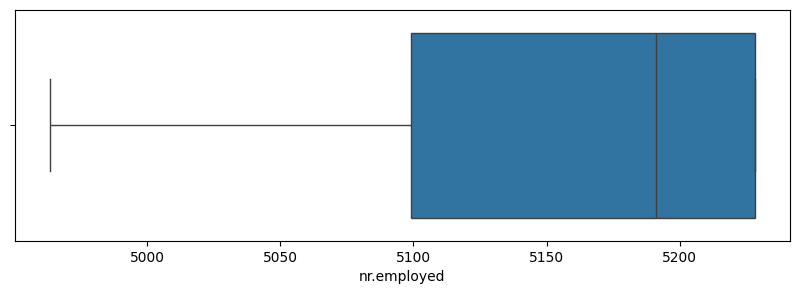

In [545]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="nr.employed")

<Axes: xlabel='euribor3m'>

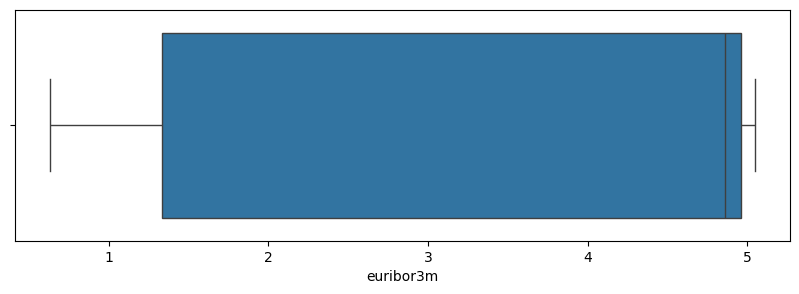

In [546]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="euribor3m")

<Axes: xlabel='cons.conf.idx'>

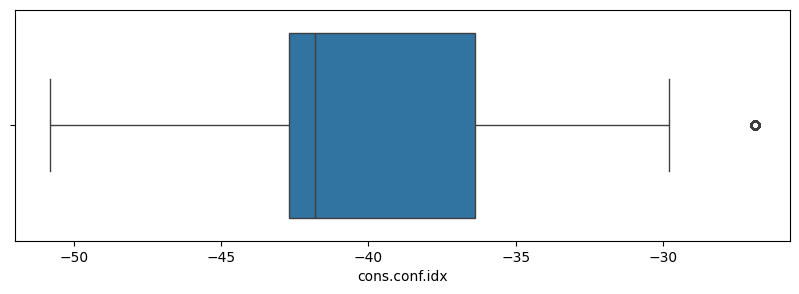

In [547]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="cons.conf.idx")

<Axes: xlabel='cons.price.idx'>

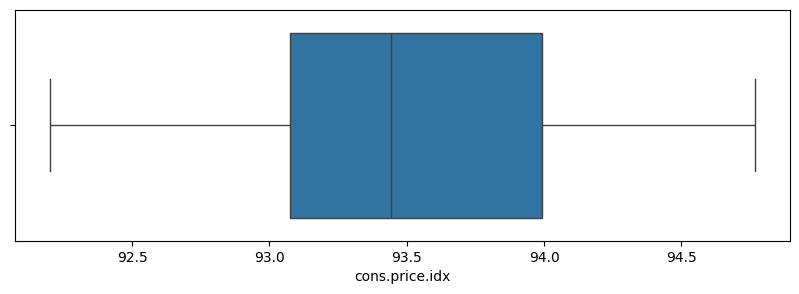

In [548]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="cons.price.idx")

<Axes: xlabel='emp.var.rate'>

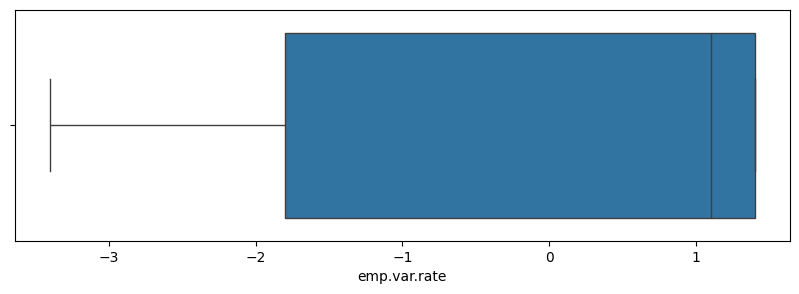

In [549]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="emp.var.rate")

<Axes: xlabel='pdays'>

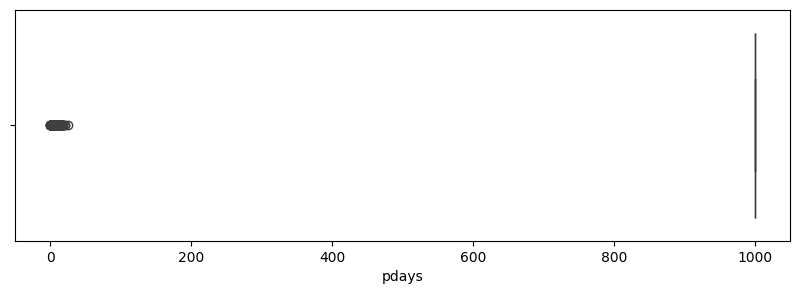

In [550]:
plt.figure(figsize=(10,3))
sns.boxplot(data=X_train, x="pdays")

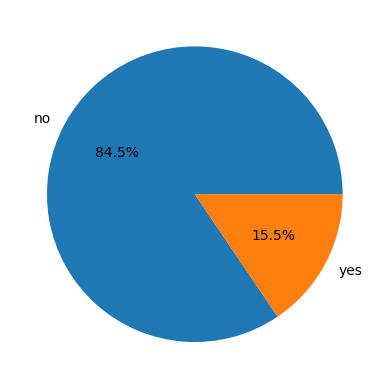

In [551]:
fig, ax = plt.subplots()
loan_count = X_train['loan'].value_counts()
ax.pie(x=loan_count.values, labels=loan_count.index, autopct="%1.1f%%")
plt.show()

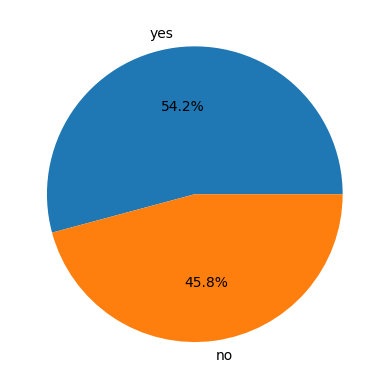

In [552]:
fig, ax = plt.subplots()
housing_count = X_train['housing'].value_counts()
ax.pie(x=housing_count.values, labels=housing_count.index, autopct="%1.1f%%")
plt.show()

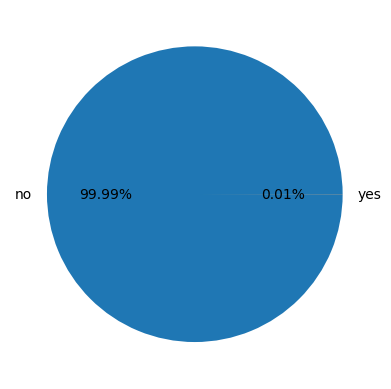

In [553]:
fig, ax = plt.subplots()
default_count = X_train['default'].value_counts()
ax.pie(x=default_count.values, labels=default_count.index, autopct="%1.2f%%")
plt.show()

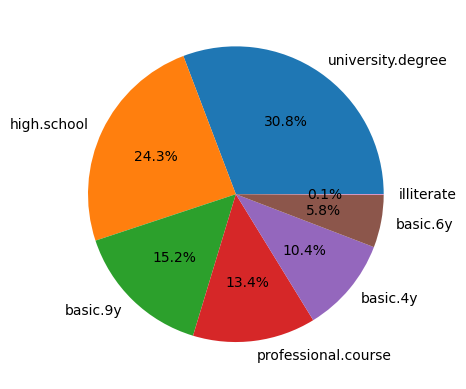

In [554]:
fig, ax = plt.subplots()
education_count = X_train['education'].value_counts()
ax.pie(x=education_count.values, labels=education_count.index, autopct="%1.1f%%")
plt.show()

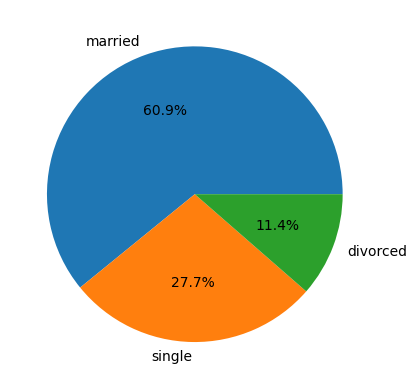

In [555]:
fig, ax = plt.subplots()
marital_count = X_train['marital'].value_counts()
ax.pie(x=marital_count.values, labels=marital_count.index, autopct="%1.1f%%")
plt.show()

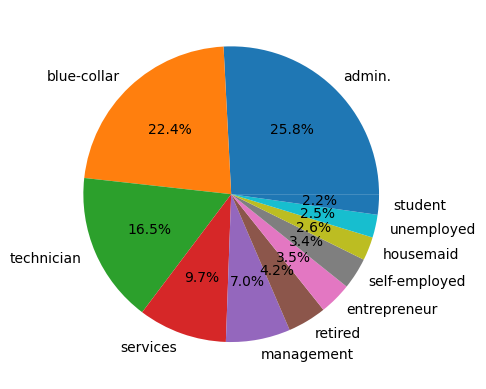

In [556]:
fig, ax = plt.subplots()
job_count = X_train['job'].value_counts()
ax.pie(x=job_count.values, labels=job_count.index, autopct="%1.1f%%")
plt.show()

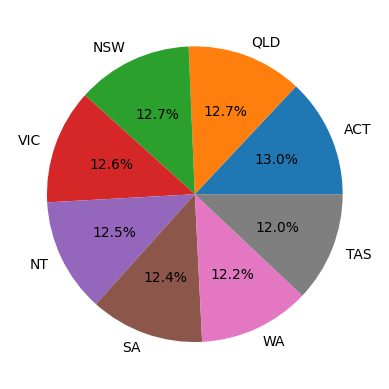

In [557]:
fig, ax = plt.subplots()
state_count = X_train['state'].value_counts()
ax.pie(x=state_count.values, labels=state_count.index, autopct="%1.1f%%")
plt.show()

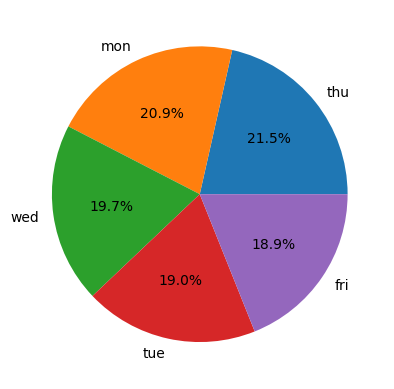

In [558]:
fig, ax = plt.subplots()
day_of_week_count = X_train['day_of_week'].value_counts()
ax.pie(x=day_of_week_count.values, labels=day_of_week_count.index, autopct="%1.1f%%")
plt.show()

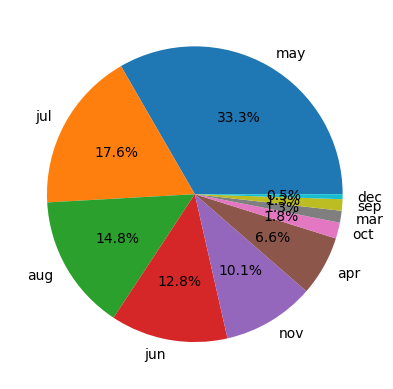

In [559]:
fig, ax = plt.subplots()
month_count = X_train['month'].value_counts()
ax.pie(x=month_count.values, labels=month_count.index, autopct="%1.1f%%")
plt.show()

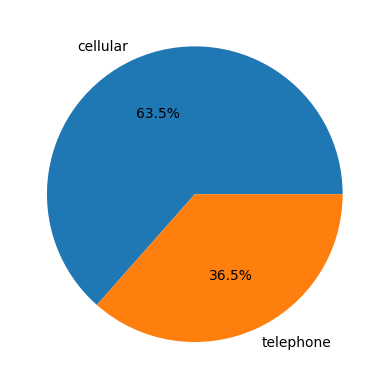

In [560]:
fig, ax = plt.subplots()
contact_count = X_train['contact'].value_counts()
ax.pie(x=contact_count.values, labels=contact_count.index, autopct="%1.1f%%")
plt.show()

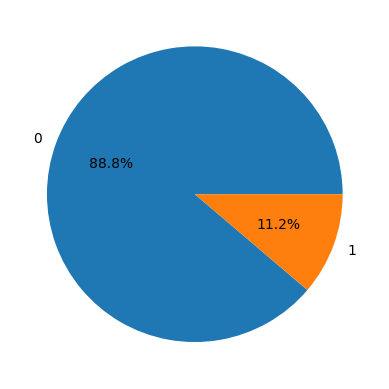

In [561]:
fig, ax = plt.subplots()
subscribed_count = Y_train.value_counts()
ax.pie(x=subscribed_count.values, labels=subscribed_count.index, autopct="%1.1f%%")
plt.show()

Pearson Correlation

<Axes: >

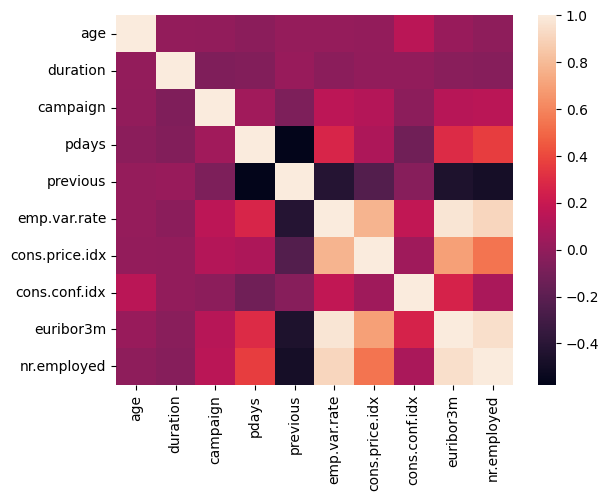

In [562]:
temp = X_train.select_dtypes(include=['int64', 'float64'])
sns.heatmap(temp.corr(method='pearson'))

Spearman Correlation

<Axes: >

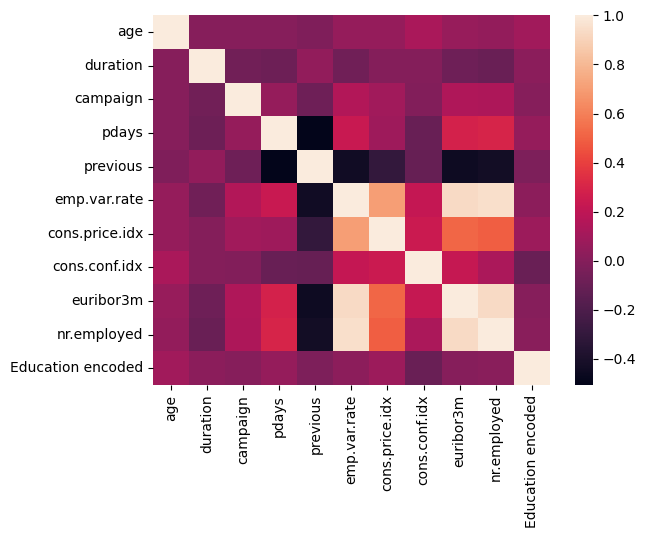

In [563]:
temp = X_train.copy()
education_category = temp['education'].unique()
education_category = education_category[1:] # Remove NA
ordinal_encoder = OrdinalEncoder(categories=[['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'illiterate']], handle_unknown='use_encoded_value', unknown_value=-1)
temp['Education encoded'] = ordinal_encoder.fit_transform(temp[['education']])
temp = temp.select_dtypes(include=['float64', 'int64'])
sns.heatmap(temp.corr(method='spearman'))

In [564]:
pdays_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Impute NA values in pdays column
X_train['pdays'] = pdays_imputer.fit_transform(X_train[['pdays']])
X_validate['pdays'] = pdays_imputer.transform(X_validate[['pdays']])
test_dataset['pdays'] = pdays_imputer.transform(test_dataset[['pdays']])

In [565]:
# Train model to impute NA values in emp.var.rate
X_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_numeric = X_numeric.dropna()
validate_numeric = X_validate.select_dtypes(include=['float64', 'int64'])
validate_numeric = validate_numeric.dropna()

response = X_numeric['emp.var.rate']
predictor = X_numeric.drop(columns=['emp.var.rate'])

emp_var_rate_imputer = DecisionTreeRegressor(criterion='squared_error', random_state=0)
emp_var_rate_imputer.fit(predictor, response)

print(f"MSE: {mean_squared_error(response, emp_var_rate_imputer.predict(predictor))}") # In-sample Performance
print(f"R2: {r2_score(response, emp_var_rate_imputer.predict(predictor))}")

response = validate_numeric['emp.var.rate']
predictor = validate_numeric.drop(columns=['emp.var.rate'])

print(f"MSE: {mean_squared_error(response, emp_var_rate_imputer.predict(predictor))}") # Out-sample Performance
print(f"R2: {r2_score(response, emp_var_rate_imputer.predict(predictor))}")

MSE: 1.8701060409981618e-26
R2: 1.0
MSE: 1.8887146946235862e-26
R2: 1.0


In [566]:
# Impute NA values in emp.var.rate column
X_train.loc[X_train[X_train['emp.var.rate'].isnull()].index, 'emp.var.rate'] = emp_var_rate_imputer.predict(X_train[X_train['emp.var.rate'].isnull()].drop(columns=['emp.var.rate']).select_dtypes(include=['float64', 'int64']))
X_validate.loc[X_validate[X_validate['emp.var.rate'].isnull()].index, 'emp.var.rate'] = emp_var_rate_imputer.predict(X_validate[X_validate['emp.var.rate'].isnull()].drop(columns=['emp.var.rate']).select_dtypes(include=['float64', 'int64']))
test_dataset.loc[test_dataset[test_dataset['emp.var.rate'].isnull()].index, 'emp.var.rate'] = emp_var_rate_imputer.predict(test_dataset[test_dataset['emp.var.rate'].isnull()].drop(columns=['emp.var.rate', 'row ID']).select_dtypes(include=['float64', 'int64']))

In [567]:
# Train model to impute NA values in euribor3m
response = X_numeric['euribor3m']
predictor = X_numeric.drop(columns=['euribor3m'])

euribor3m_imputer = DecisionTreeRegressor(criterion='squared_error', random_state=0)
euribor3m_imputer.fit(predictor, response)

print(f"MSE: {mean_squared_error(response, euribor3m_imputer.predict(predictor))}") # In-sample Performance
print(f"R2: {r2_score(response, euribor3m_imputer.predict(predictor))}")

response = validate_numeric['euribor3m']
predictor_test = validate_numeric.drop(columns=['euribor3m'])

print(f"MSE: {mean_squared_error(response, euribor3m_imputer.predict(predictor_test))}") #Out-sample Performance
print(f"R2: {r2_score(response, euribor3m_imputer.predict(predictor_test))}")

MSE: 3.0595027254658865e-05
R2: 0.9999902389372537
MSE: 0.0019376614470676674
R2: 0.9993833290668851


In [568]:
# Impute NA values in euribor3m column
X_train.loc[X_train[X_train['euribor3m'].isnull()].index, 'euribor3m'] = euribor3m_imputer.predict(X_train[X_train['euribor3m'].isnull()].drop(columns=['euribor3m']).select_dtypes(include=['float64', 'int64']))
X_validate.loc[X_validate[X_validate['euribor3m'].isnull()].index, 'euribor3m'] = euribor3m_imputer.predict(X_validate[X_validate['euribor3m'].isnull()].drop(columns=['euribor3m']).select_dtypes(include=['float64', 'int64']))

In [569]:
# Train model to impute NA values in nr.employed
response = X_numeric['nr.employed']
predictor = X_numeric.drop(columns=['nr.employed'])

nr_employed_imputer = DecisionTreeRegressor(criterion='squared_error', random_state=0)
nr_employed_imputer.fit(predictor, response)

print(f"MSE: {mean_squared_error(response, nr_employed_imputer.predict(predictor))}") # In-sample Performance
print(f"R2: {r2_score(response, nr_employed_imputer.predict(predictor))}")

response = validate_numeric['nr.employed']
predictor_test = validate_numeric.drop(columns=['nr.employed'])

print(f"MSE: {mean_squared_error(response, nr_employed_imputer.predict(predictor_test))}") #Out-sample Performance
print(f"R2: {r2_score(response, nr_employed_imputer.predict(predictor_test))}")

MSE: 2.1820422268723163e-19
R2: 1.0
MSE: 2.217945056382177e-19
R2: 1.0


In [570]:
# Impute NA values in nr.employed column
X_train.loc[X_train[X_train['nr.employed'].isnull()].index, 'nr.employed'] = nr_employed_imputer.predict(X_train[X_train['nr.employed'].isnull()].drop(columns=['nr.employed']).select_dtypes(include=['float64', 'int64']))
X_validate.loc[X_validate[X_validate['nr.employed'].isnull()].index, 'nr.employed'] = nr_employed_imputer.predict(X_validate[X_validate['nr.employed'].isnull()].drop(columns=['nr.employed']).select_dtypes(include=['float64', 'int64']))
test_dataset.loc[test_dataset[test_dataset['nr.employed'].isnull()].index, 'nr.employed'] = nr_employed_imputer.predict(test_dataset[test_dataset['nr.employed'].isnull()].drop(columns=['nr.employed', 'row ID']).select_dtypes(include=['float64', 'int64']))

In [571]:
# Train model to impute NA values in cons.price.idx
response = X_numeric['cons.price.idx']
predictor = X_numeric.drop(columns=['cons.price.idx'])

cons_price_idx_imputer = DecisionTreeRegressor(criterion='squared_error', random_state=0)
cons_price_idx_imputer.fit(predictor, response)

print(f"MSE: {mean_squared_error(response, cons_price_idx_imputer.predict(predictor))}") # In-sample Performance
print(f"R2: {r2_score(response, cons_price_idx_imputer.predict(predictor))}")

response = validate_numeric['cons.price.idx']
predictor_test = validate_numeric.drop(columns=['cons.price.idx'])

print(f"MSE: {mean_squared_error(response, cons_price_idx_imputer.predict(predictor_test))}") #Out-sample Performance
print(f"R2: {r2_score(response, cons_price_idx_imputer.predict(predictor_test))}")

MSE: 7.26921577946701e-24
R2: 1.0
MSE: 7.275559243353805e-24
R2: 1.0


In [572]:
# Impute NA values in cons.price.idx column
X_train.loc[X_train[X_train['cons.price.idx'].isnull()].index, 'cons.price.idx'] = cons_price_idx_imputer.predict(X_train[X_train['cons.price.idx'].isnull()].drop(columns=['cons.price.idx']).select_dtypes(include=['float64', 'int64']))
X_validate.loc[X_validate[X_validate['cons.price.idx'].isnull()].index, 'cons.price.idx'] = cons_price_idx_imputer.predict(X_validate[X_validate['cons.price.idx'].isnull()].drop(columns=['cons.price.idx']).select_dtypes(include=['float64', 'int64']))
test_dataset.loc[test_dataset[test_dataset['cons.price.idx'].isnull()].index, 'cons.price.idx'] = cons_price_idx_imputer.predict(test_dataset[test_dataset['cons.price.idx'].isnull()].drop(columns=['cons.price.idx', 'row ID']).select_dtypes(include=['float64', 'int64']))

In [573]:
# Train model to impute NA values in cons.conf.idx
response = X_numeric['cons.conf.idx']
predictor = X_numeric.drop(columns=['cons.conf.idx'])

cons_conf_idx_imputer = DecisionTreeRegressor(criterion='squared_error', random_state=0)
cons_conf_idx_imputer.fit(predictor, response)

print(f"MSE: {mean_squared_error(response, cons_conf_idx_imputer.predict(predictor))}") # In-sample Performance
print(f"R2: {r2_score(response, cons_conf_idx_imputer.predict(predictor))}")

response = validate_numeric['cons.conf.idx']
predictor_test = validate_numeric.drop(columns=['cons.conf.idx'])

print(f"MSE: {mean_squared_error(response, cons_conf_idx_imputer.predict(predictor_test))}") #Out-sample Performance
print(f"R2: {r2_score(response, cons_conf_idx_imputer.predict(predictor_test))}")

MSE: 1.6048546704261298e-24
R2: 1.0
MSE: 1.6226055950586126e-24
R2: 1.0


In [574]:
# Impute NA values in cons.conf.idx column
X_train.loc[X_train[X_train['cons.conf.idx'].isnull()].index, 'cons.conf.idx'] = cons_conf_idx_imputer.predict(X_train[X_train['cons.conf.idx'].isnull()].drop(columns=['cons.conf.idx']).select_dtypes(include=['float64', 'int64']))
X_validate.loc[X_validate[X_validate['cons.conf.idx'].isnull()].index, 'cons.conf.idx'] = cons_conf_idx_imputer.predict(X_validate[X_validate['cons.conf.idx'].isnull()].drop(columns=['cons.conf.idx']).select_dtypes(include=['float64', 'int64']))

## Normalization

In [ ]:
X_train = X_train.astype({'previous' : float,
                          'campaign' : float,
                          'duration' : float,
                          'age' : float})

X_validate = X_validate.astype({'previous' : float,
                                'campaign' : float,
                                'duration' : float,
                                'age' : float})

test_dataset = test_dataset.astype({'previous' : float,
                                    'campaign' : float,
                                    'duration' : float,
                                    'age' : float})

#scaler = StandardScaler() Standardization
scaler = MinMaxScaler() # Normalization

scale_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_train.loc[:, scale_col] = scaler.fit_transform(X_train.loc[:, scale_col])
X_validate.loc[:, scale_col] = scaler.transform(X_validate.loc[:, scale_col])
test_dataset.loc[:, scale_col] = scaler.transform(test_dataset.loc[:, scale_col])

X_train.replace(to_replace=['no', 'yes'], value=['0', '1'], inplace=True)
X_validate.replace(to_replace=['no', 'yes'], value=['0', '1'], inplace=True)
test_dataset.replace(to_replace=['no', 'yes'], value=['0', '1'], inplace=True)

# Model Building

In [ ]:
mask_null_train = X_train[X_train.isnull().any(axis=1)].index
mask_null_validate = X_validate[X_validate.isnull().any(axis=1)].index
X_train = X_train.dropna()
X_validate = X_validate.dropna()
Y_train = Y_train.drop(mask_null_train)
Y_validate = Y_validate.drop(mask_null_validate)

X_train = pd.get_dummies(data=X_train, columns=['job', 'marital', 'contact', 'state', 'poutcome'], dtype=int, drop_first=True)
X_validate = pd.get_dummies(data=X_validate, columns=['job', 'marital', 'contact', 'state', 'poutcome'], dtype=int, drop_first=True)

education_encoder = OrdinalEncoder(dtype=int)
day_of_week_encoder = OrdinalEncoder(dtype=int)
month_encoder = OrdinalEncoder(dtype=int)

X_train.loc[:, ['education']] = education_encoder.fit_transform(X_train.loc[:, ['education']])
X_validate.loc[:, ['education']] = education_encoder.transform(X_validate.loc[:, ['education']])
X_train.loc[:, ['day_of_week']] = day_of_week_encoder.fit_transform(X_train.loc[:, ['day_of_week']])
X_validate.loc[:, ['day_of_week']] = day_of_week_encoder.transform(X_validate.loc[:, ['day_of_week']])
X_train.loc[:, ['month']] = month_encoder.fit_transform(X_train.loc[:, ['month']])
X_validate.loc[:, ['month']] = month_encoder.transform(X_validate.loc[:, ['month']])

smote = SMOTE(random_state=1)
new_predictor, new_response = smote.fit_resample(X_train, Y_train)
X_train.head(15)

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,state_NSW,state_NT,state_QLD,state_SA,state_TAS,state_VIC,state_WA,poutcome_nonexistent,poutcome_success
17451,-0.296956,6,0,1,1,7,0,1.525458,-0.576970,0.195905,-0.354118,-0.108061,-0.638676,-0.323803,0.233878,0.400893,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
20212,-1.067674,5,0,1,0,6,2,-0.629351,-0.576970,0.195905,-0.354118,-1.184838,-1.169948,-1.228717,-1.318738,-0.944675,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
24505,-1.164014,3,0,0,0,8,4,2.650201,-0.576970,0.195905,-0.354118,-2.198276,-1.969452,2.929580,-1.655887,-2.080129,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
6804,-1.067674,6,0,0,1,4,3,1.237645,-0.203221,0.195905,-0.354118,0.842037,1.550442,-0.280711,0.775622,0.850344,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
23543,0.088404,6,0,1,0,4,1,-0.617990,-0.576970,0.195905,-0.354118,-1.881577,-1.048811,-0.065256,-1.357352,-1.263326,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
17755,-0.585975,5,0,0,0,5,0,0.162134,0.170529,0.195905,-0.354118,-1.184838,-1.256474,-2.047449,-1.088785,-0.944675,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
7199,0.377423,5,0,1,0,4,0,-0.262011,-0.203221,0.195905,-0.354118,0.842037,1.550442,-0.280711,0.774469,0.850344,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
6304,-1.164014,6,0,0,0,4,4,-0.208993,0.170529,0.195905,-0.354118,0.842037,1.550442,-0.280711,0.774469,0.850344,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0
2476,-0.200616,2,0,1,1,6,1,0.794565,-0.576970,0.195905,-0.354118,0.652017,0.735363,0.882750,0.716261,0.334102,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
23901,4.327356,5,0,0,0,1,3,-0.447575,-0.576970,0.195905,-0.354118,-1.881577,-2.367473,1.960029,-1.574626,-1.263326,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### DecisionTreeClassifier

In [45]:
sfs = SFS(DecisionTreeClassifier(),     # model
          k_features=10,                # choose number of features
          forward=False,                # or False for backward
          floating=True,                # improves flexibility
          scoring='accuracy',
          cv=5)

sfs.fit(X_train, Y_train)
selected_features = list(sfs.k_feature_names_)
selected_features

['age',
 'education',
 'housing',
 'day_of_week',
 'duration',
 'euribor3m',
 'job_housemaid',
 'job_self-employed',
 'state_NT',
 'poutcome_success']

In [200]:
w_train = compute_sample_weight(class_weight='balanced', y=Y_train)
class_weight_dict = dict(zip(response.unique(), w_train))

param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'min_samples_leaf' : [2, 3, 4, 5], #1
              'max_depth' : [15, 10]} #20

model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train[selected_features], Y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2}
0.870468789385334


DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, random_state=0)

In [46]:
importances = grid_search.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
4,duration,0.469470
5,euribor3m,0.361416
0,age,0.076782
3,day_of_week,0.038265
1,education,0.026947
2,housing,0.009181
8,state_NT,0.006779
9,poutcome_success,0.006223
7,job_self-employed,0.003217
6,job_housemaid,0.001720


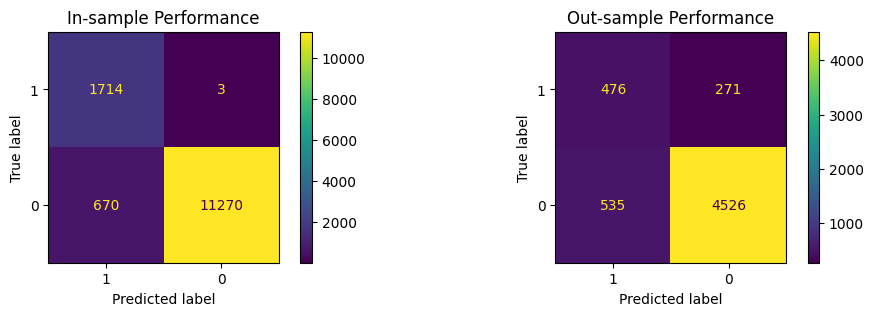

In [47]:
confusion_train = confusion_matrix(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance")
plt.show()

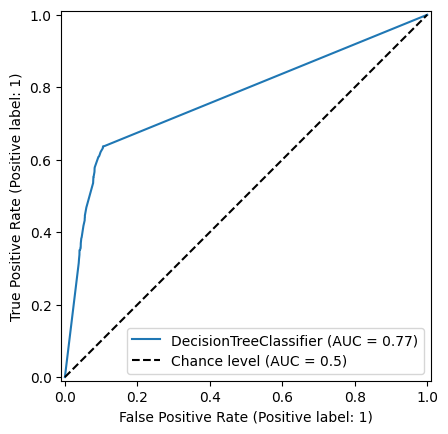

In [ ]:
decision_tree_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate[selected_features], Y_validate, plot_chance_level=True)
plt.show() # Validation

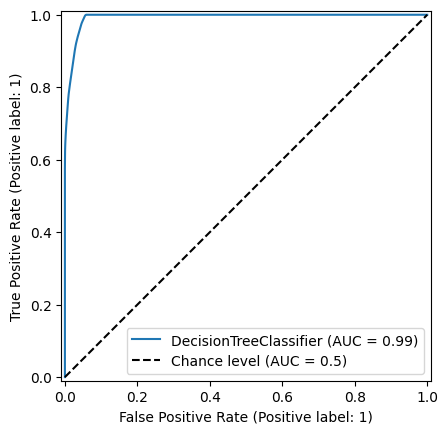

In [49]:
decision_tree_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train[selected_features], Y_train, plot_chance_level=True)
plt.show() # Training

In [87]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.943506,0.470821,0.861226,0.707164,0.882712
recall,0.894290,0.637216,0.861226,0.765753,0.861226
f1-score,0.918239,0.541524,0.861226,0.729882,0.869788
support,5061.000000,747.000000,0.861226,5808.000000,5808.000000


In [201]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.999734,0.718960,0.950721,0.859347,0.964434
recall,0.943886,0.998253,0.950721,0.971069,0.950721
f1-score,0.971008,0.835894,0.950721,0.903451,0.954021
support,11940.000000,1717.000000,0.950721,13657.000000,13657.000000


### RandomForest

In [613]:
sfs = SFS(RandomForestClassifier(),
          k_features=10,       # choose number of features
          forward=False,        # or False for backward
          floating=True,       # improves flexibility
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs.fit(X_train, Y_train)
selected_features = list(sfs.k_feature_names_)
selected_features

['age',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'euribor3m',
 'contact_cellular',
 'state_WA']

In [203]:
w_train = compute_sample_weight(class_weight='balanced', y=Y_train)
class_weight_dict = dict(zip(response.unique(), w_train))

param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'min_samples_leaf' : [1, 2, 3, 4, 5],
              'max_depth' : [20, 15, 10]}
model = RandomForestClassifier(random_state=0, bootstrap=True, n_estimators=100)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(new_predictor[selected_features], new_response)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 45 candidates, totalling 450 fits
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}
0.9374790619765495


RandomForestClassifier(criterion='entropy', max_depth=20, random_state=0)

In [52]:
importances = grid_search.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
2,duration,0.394353
7,euribor3m,0.201977
6,emp.var.rate,0.116916
3,campaign,0.088160
0,age,0.073033
1,day_of_week,0.044170
4,pdays,0.033251
5,previous,0.026155
8,contact_cellular,0.014583
9,state_WA,0.007402


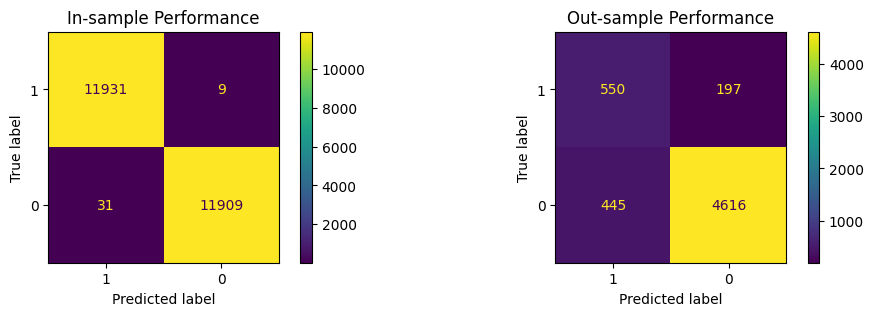

In [91]:
confusion_train = confusion_matrix(new_response, grid_search.best_estimator_.predict(new_predictor[selected_features]), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance")
plt.show()

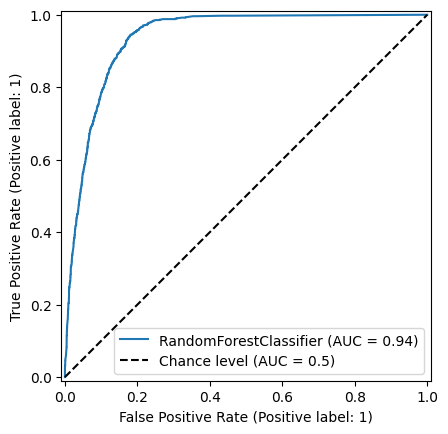

In [54]:
random_forest_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate[selected_features], Y_validate, plot_chance_level=True)
plt.show()

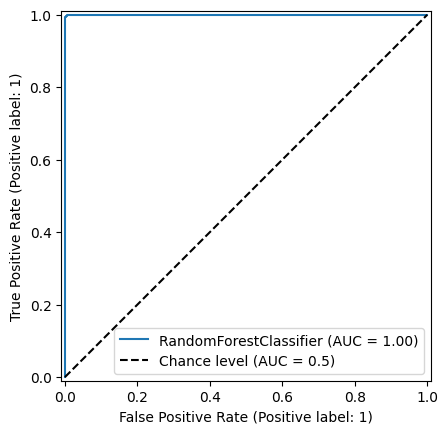

In [55]:
random_forest_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train[selected_features], Y_train, plot_chance_level=True)
plt.show()

In [93]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.959069,0.552764,0.889463,0.755917,0.906812
recall,0.912073,0.736278,0.889463,0.824176,0.889463
f1-score,0.934981,0.631458,0.889463,0.783219,0.895943
support,5061.000000,747.000000,0.889463,5808.000000,5808.000000


In [204]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.999580,0.982215,0.997364,0.990897,0.997397
recall,0.997404,0.997088,0.997364,0.997246,0.997364
f1-score,0.998491,0.989595,0.997364,0.994043,0.997372
support,11940.000000,1717.000000,0.997364,13657.000000,13657.000000


### KNN

In [95]:
sfs = SFS(KNeighborsClassifier(),
          k_features=10,       # choose number of features
          forward=False,        # or False for backward
          floating=True,       # improves flexibility
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs.fit(X_train, Y_train)
selected_features = list(sfs.k_feature_names_)
selected_features

['loan',
 'duration',
 'emp.var.rate',
 'euribor3m',
 'job_blue-collar',
 'job_entrepreneur',
 'marital_married',
 'marital_single',
 'state_QLD',
 'poutcome_success']

In [206]:
param_grid = {'n_neighbors' : [7],
              'weights' : ['distance', 'uniform']}

model = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(new_predictor[selected_features], new_response)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'n_neighbors': 7, 'weights': 'distance'}
0.8967336683417086


KNeighborsClassifier(n_jobs=-1, n_neighbors=7, weights='distance')

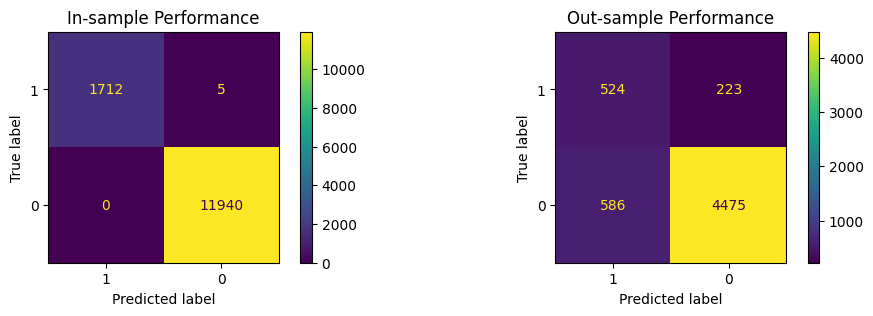

In [58]:
confusion_train = confusion_matrix(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance")
plt.show()

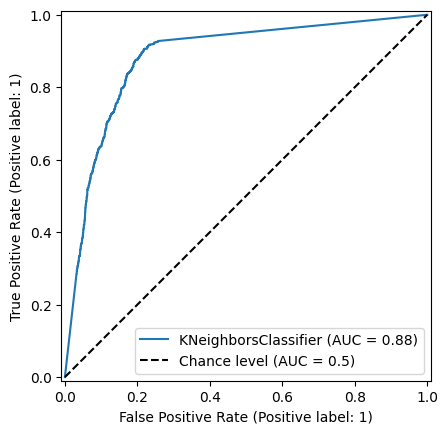

In [59]:
knn_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate[selected_features], Y_validate, plot_chance_level=True)
plt.show()

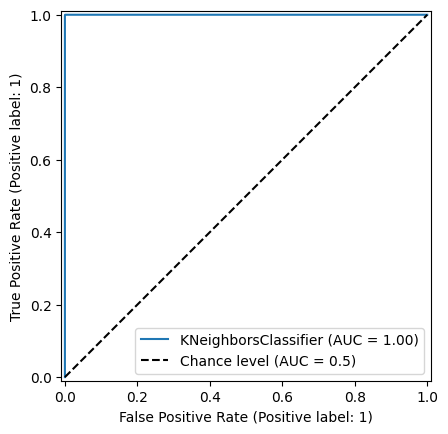

In [60]:
knn_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train[selected_features], Y_train, plot_chance_level=True)
plt.show()

In [118]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.952533,0.472072,0.860709,0.712303,0.890738
recall,0.884213,0.701473,0.860709,0.792843,0.860709
f1-score,0.917102,0.564351,0.860709,0.740727,0.871733
support,5061.000000,747.000000,0.860709,5808.000000,5808.000000


In [207]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.999581,1.000000,0.999634,0.999791,0.999634
recall,1.000000,0.997088,0.999634,0.998544,0.999634
f1-score,0.999791,0.998542,0.999634,0.999166,0.999634
support,11940.000000,1717.000000,0.999634,13657.000000,13657.000000


In [113]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train[selected_features], Y_train, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

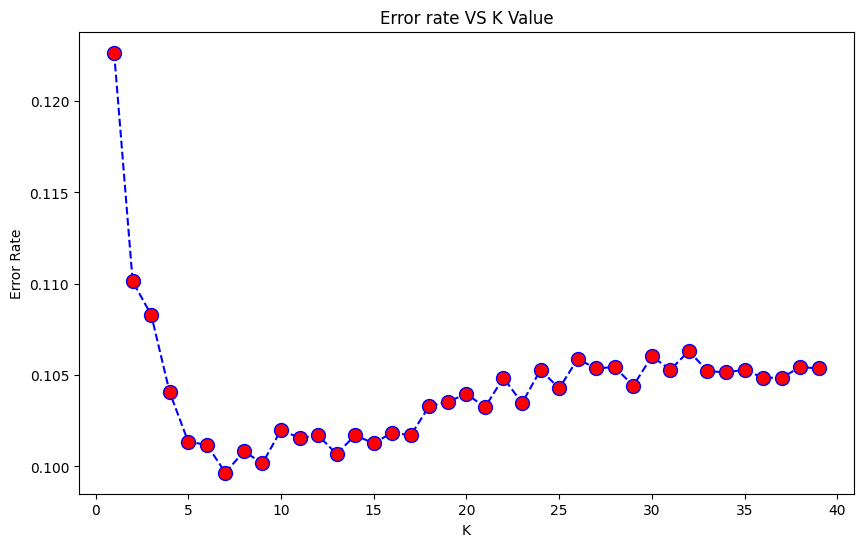

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Gradient Boosting

In [625]:
sfs = SFS(HistGradientBoostingClassifier(),
          k_features=10,       # choose number of features
          forward=False,        # or False for backward
          floating=True,       # improves flexibility
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs.fit(X_train, Y_train)
selected_features = list(sfs.k_feature_names_)
selected_features

['default',
 'day_of_week',
 'duration',
 'emp.var.rate',
 'euribor3m',
 'job_management',
 'contact_cellular',
 'state_NSW',
 'poutcome_failure',
 'poutcome_success']

In [209]:
param_grid = {'loss' : ['log_loss'],
              'min_samples_leaf' : [1, 2, 3, 4, 5],
              'max_depth' : [20, 15, 10]}

model = HistGradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(new_predictor[selected_features], new_response)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'loss': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 3}
0.9237437185929649


HistGradientBoostingClassifier(max_depth=15, min_samples_leaf=3, random_state=0)

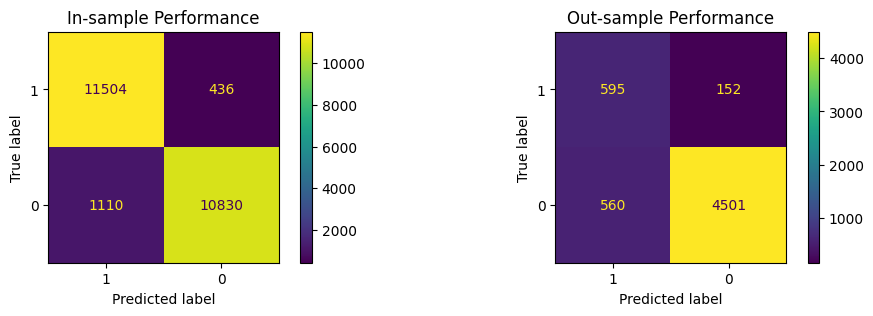

In [63]:
confusion_train = confusion_matrix(new_response, grid_search.best_estimator_.predict(new_predictor[selected_features]), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance") #450 4768 (SMOTE + no weight)
plt.show()

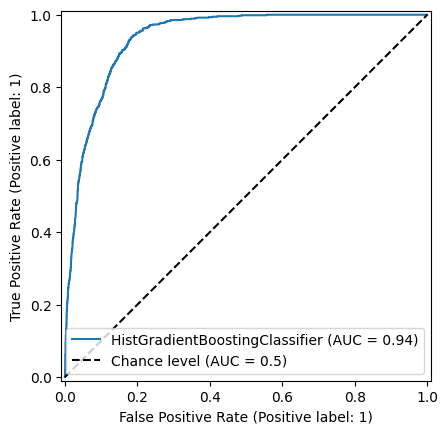

In [64]:
gradient_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate[selected_features], Y_validate, plot_chance_level=True)
plt.show()

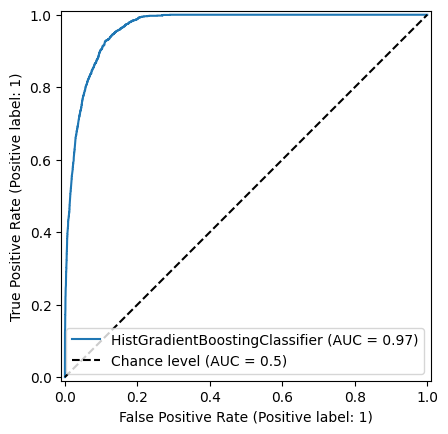

In [65]:
gradient_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train[selected_features], Y_train, plot_chance_level=True)
plt.show()

In [152]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.967333,0.515152,0.87741,0.741242,0.909175
recall,0.889350,0.796519,0.87741,0.842935,0.877410
f1-score,0.926704,0.625657,0.87741,0.776180,0.887984
support,5061.000000,747.000000,0.87741,5808.000000,5808.000000


In [210]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.982402,0.578428,0.904518,0.780415,0.931613
recall,0.907035,0.887012,0.904518,0.897024,0.904518
f1-score,0.943215,0.700230,0.904518,0.821723,0.912667
support,11940.000000,1717.000000,0.904518,13657.000000,13657.000000


### NeuralNetwork

In [43]:
sfs = SFS(MLPClassifier(),
          k_features=10,       # choose number of features
          forward=False,        # or False for backward
          floating=True,       # improves flexibility
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs.fit(X_train, Y_train)
selected_features = list(sfs.k_feature_names_)
selected_features

c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

['age',
 'duration',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'contact_telephone',
 'state_QLD',
 'poutcome_nonexistent']

In [212]:
param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam']}

model = MLPClassifier(random_state=0, max_iter=300, hidden_layer_sizes=(100))
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(new_predictor[selected_features], new_response)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'activation': 'relu', 'solver': 'adam'}
0.8940536013400335


c:\Users\X1 Carbon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=300, random_state=0)

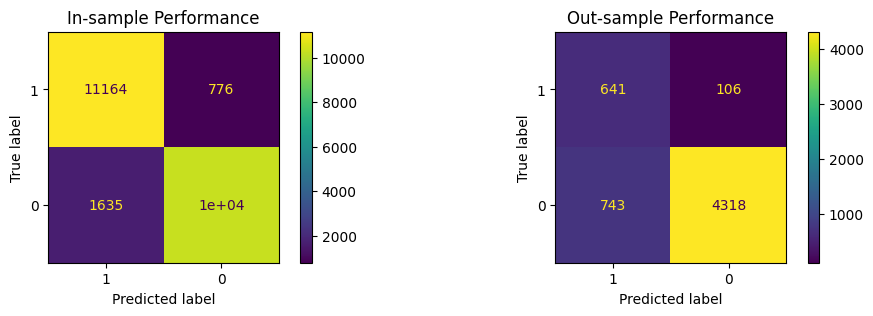

In [157]:
confusion_train = confusion_matrix(new_response, grid_search.best_estimator_.predict(new_predictor[selected_features]), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance") #450 4768 (SMOTE + no weight)      641 4318 do the selected!!
plt.show()

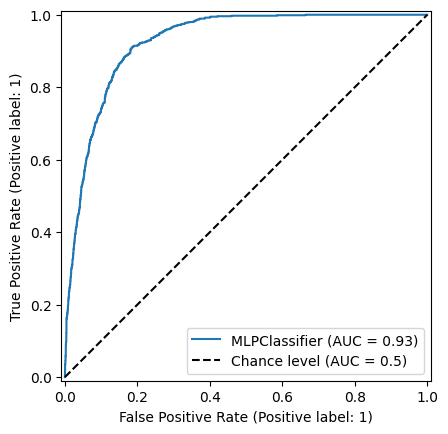

In [48]:
nn_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate[selected_features], Y_validate, plot_chance_level=True)
plt.show()

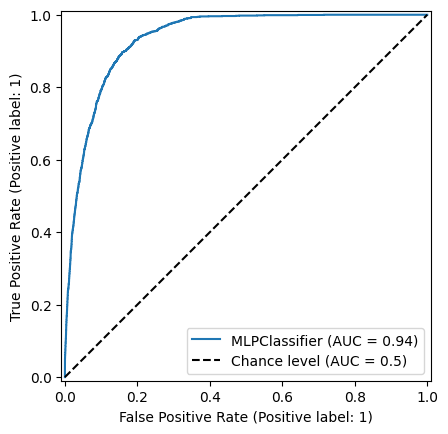

In [49]:
nn_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train[selected_features], Y_train, plot_chance_level=True)
plt.show()

In [50]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.976040,0.463150,0.853822,0.719595,0.910074
recall,0.853191,0.858099,0.853822,0.855645,0.853822
f1-score,0.910490,0.601595,0.853822,0.756043,0.870762
support,5061.000000,747.000000,0.853822,5808.000000,5808.000000


In [213]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train[selected_features]), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.978168,0.476297,0.86344,0.727233,0.915071
recall,0.863065,0.866045,0.86344,0.864555,0.863440
f1-score,0.917019,0.614590,0.86344,0.765804,0.878997
support,11940.000000,1717.000000,0.86344,13657.000000,13657.000000


### SVM

In [214]:
param_grid = {'C' : [1, 0.5, 0.05, 0.01]}
w_train = compute_sample_weight(class_weight='balanced', y=Y_train)
class_weight_dict = dict(zip(response.unique(), w_train))

model = SVC(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(new_predictor, new_response)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'C': 1}
0.903643216080402


SVC(C=1, random_state=0)

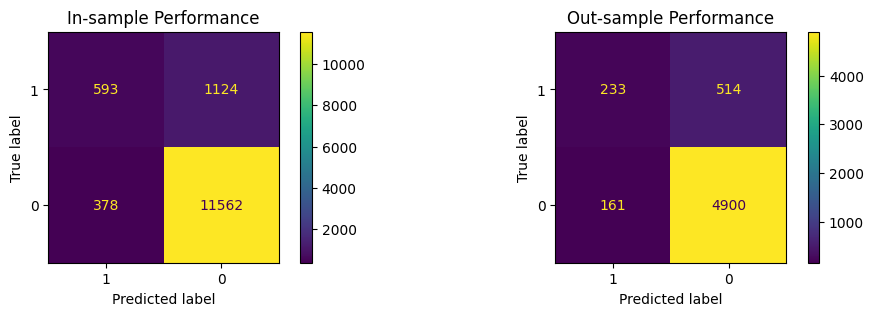

In [67]:
confusion_train = confusion_matrix(Y_train, grid_search.best_estimator_.predict(X_train), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, grid_search.best_estimator_.predict(X_validate), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance") #233 4900 (SMOTE)      569 4181 (weight + no SMOTE)    155 4978 (no weight + no SMOTE)
plt.show()

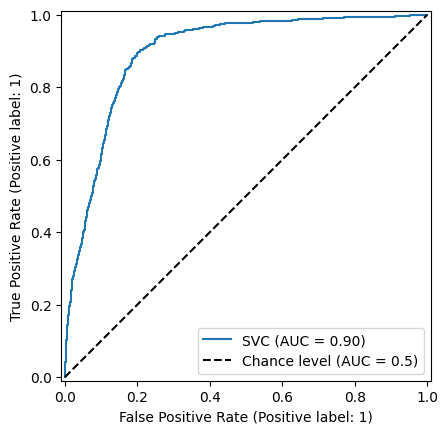

In [63]:
svm_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_validate, Y_validate, plot_chance_level=True)
plt.show()

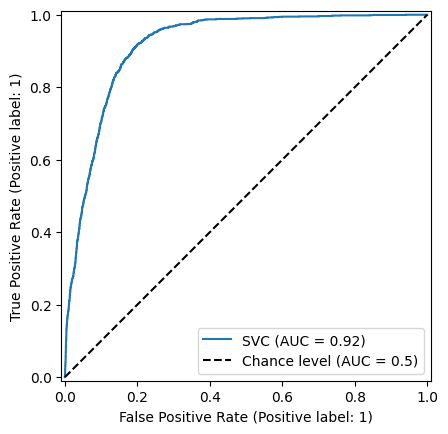

In [64]:
svm_disp_1 = RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_train, Y_train, plot_chance_level=True)
plt.show()

In [66]:
report = classification_report(Y_validate, grid_search.best_estimator_.predict(X_validate), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.905061,0.591371,0.883781,0.748216,0.864715
recall,0.968188,0.311914,0.883781,0.640051,0.883781
f1-score,0.935561,0.408414,0.883781,0.671987,0.867761
support,5061.000000,747.000000,0.883781,5808.000000,5808.000000


In [215]:
report = classification_report(Y_train, grid_search.best_estimator_.predict(X_train), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.911398,0.610711,0.89002,0.761054,0.873595
recall,0.968342,0.345370,0.89002,0.656856,0.890020
f1-score,0.939008,0.441220,0.89002,0.690114,0.876424
support,11940.000000,1717.000000,0.89002,13657.000000,13657.000000


### LogisticRegression

In [577]:
X_train = X_train.astype({'education' : int,
                          'day_of_week' : int,
                          'month' : int,
                          'default' : int,
                          'housing' : int,
                          'loan' : int})

X_validate = X_validate.astype({'education' : int,
                          'day_of_week' : int,
                          'month' : int,
                          'default' : int,
                          'housing' : int,
                          'loan' : int})

In [590]:
selected_features = ['nr.employed', 'cons.conf.idx', 'cons.price.idx', 'previous', 'pdays', 
                     'campaign', 'duration', 'education', 'day_of_week', 'month']

predictor_validate = sm.add_constant(X_validate[selected_features])
predictor_train = sm.add_constant(X_train[selected_features])

model = sm.Logit(Y_train, predictor_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.241888
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             subscribed   No. Observations:                13657
Model:                          Logit   Df Residuals:                    13646
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.3604
Time:                        19:52:16   Log-Likelihood:                -3303.5
converged:                       True   LL-Null:                       -5164.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.9637      0.108    -27.320      0.000      -3.176      -2.751
nr.employed      

<Axes: xlabel='nr.employed', ylabel='log_odds'>

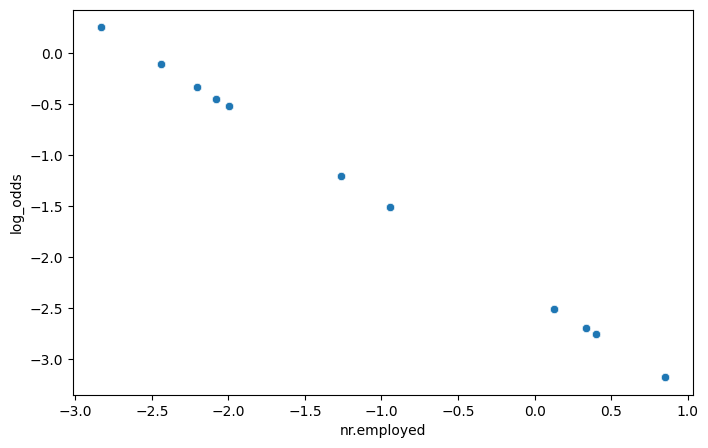

In [391]:
predictor_train['predict_proba'] = model.predict(predictor_train)
predictor_train['log_odds'] = np.log(predictor_train['predict_proba'] / (1 - predictor_train['predict_proba']))

plt.figure(figsize=(8, 5))
sns.scatterplot(data=predictor_train, x='nr.employed', y='log_odds')

In [591]:
VIF_data = pd.DataFrame({"Feature": predictor_train.columns})
VIF_data['VIF'] = [variance_inflation_factor(predictor_train.values, i) for i in range(predictor_train.shape[1])]
VIF_data.sort_values(by=['VIF'], ascending=False)


,Feature,VIF
0,const,10.922824
1,nr.employed,1.818484
4,previous,1.729743
5,pdays,1.607195
3,cons.price.idx,1.390556
10,month,1.070286
2,cons.conf.idx,1.044850
6,campaign,1.035929
8,education,1.022260
7,duration,1.009895


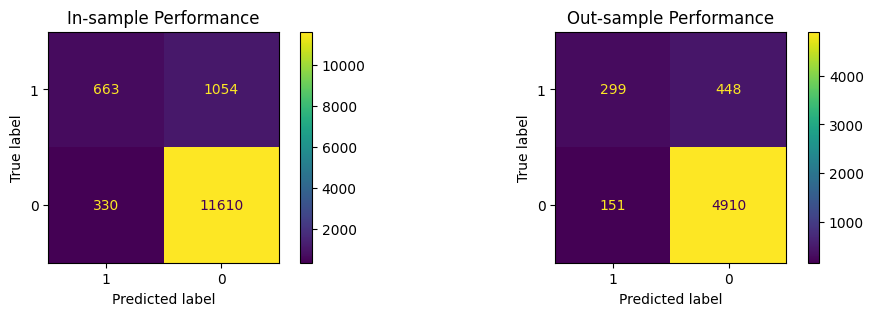

In [593]:
confusion_train = confusion_matrix(Y_train, list(map(round, model.predict(predictor_train))), labels=[1,0])
confusion_validate = confusion_matrix(Y_validate, list(map(round, model.predict(predictor_validate))), labels=[1, 0])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
display1 = ConfusionMatrixDisplay(confusion_matrix=confusion_train, display_labels=[1, 0])
display2 = ConfusionMatrixDisplay(confusion_matrix=confusion_validate, display_labels=[1, 0])
display1.plot(ax=ax[0])
display2.plot(ax=ax[1])
ax[0].set_title("In-sample Performance")
ax[1].set_title("Out-sample Performance")
plt.show()

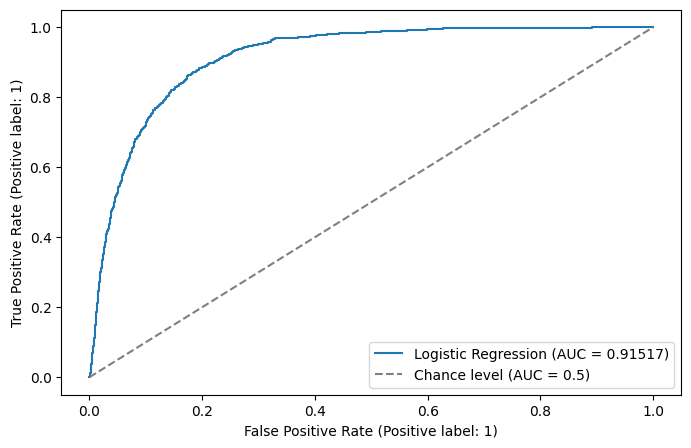

In [594]:
fpr, tpr, thresholds = roc_curve(Y_validate, model.predict(predictor_validate))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.legend()
plt.show()

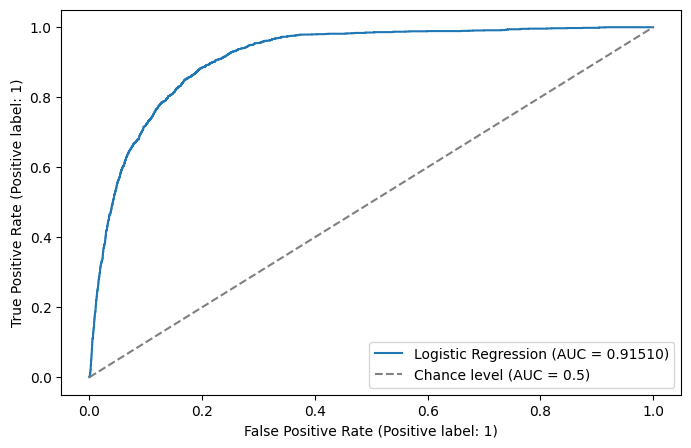

In [595]:
fpr, tpr, thresholds = roc_curve(Y_train, model.predict(predictor_train))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.legend()
plt.show()

In [596]:
report = classification_report(Y_validate, list(map(round, model.predict(predictor_validate))), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.916387,0.664444,0.896866,0.790416,0.883983
recall,0.970164,0.400268,0.896866,0.685216,0.896866
f1-score,0.942509,0.499582,0.896866,0.721046,0.885542
support,5061.000000,747.000000,0.896866,5808.000000,5808.000000


In [589]:
report = classification_report(Y_train, list(map(round, model.predict(predictor_train))), output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.916772,0.667674,0.89866,0.792223,0.885455
recall,0.972362,0.386139,0.89866,0.679250,0.898660
f1-score,0.943749,0.489299,0.89866,0.716524,0.886614
support,11940.000000,1717.000000,0.89866,13657.000000,13657.000000


# Output

### test_dataset for model that does not handle NaN natively

In [584]:
temp = test_dataset.copy()
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_col = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in impute_col:
    temp[col] = mode_imputer.fit_transform(temp[[col]]).ravel()

temp = pd.get_dummies(data=temp, columns=['job', 'marital', 'contact', 'state', 'poutcome'], dtype=int, drop_first=True)

mask_education_not_null = temp['education'].notnull()
temp.loc[mask_education_not_null, ['education']] = education_encoder.transform(temp.loc[mask_education_not_null, ['education']])

mask_month_not_null = temp['month'].notnull()
temp.loc[mask_month_not_null, ['month']] = month_encoder.transform(temp.loc[mask_month_not_null, ['month']])

mask_day_of_week_not_null = temp['day_of_week'].notnull()
temp.loc[mask_day_of_week_not_null, ['day_of_week']] = day_of_week_encoder.transform(temp.loc[mask_day_of_week_not_null, ['day_of_week']])

temp = temp.astype({'education' : int,
                    'day_of_week' : int,
                    'month' : int,
                    'default' : int,
                    'housing' : int,
                    'loan' : int})

temp = sm.add_constant(temp[selected_features])
result = pd.DataFrame({"row ID" : test_dataset['row ID'],
                       "Prediction-subscribed" : list(map(round, model.predict(temp)))})
result.shape

(6590, 2)

### test_dataset for model that handles NaN natively

In [158]:
temp = test_dataset.copy()
temp = pd.get_dummies(data=temp, columns=['job', 'marital', 'contact', 'state', 'poutcome'], dtype=int)

mask_education_not_null = temp['education'].notnull()
temp.loc[mask_education_not_null, ['education']] = education_encoder.transform(temp.loc[mask_education_not_null, ['education']])

mask_month_not_null = temp['month'].notnull()
temp.loc[mask_month_not_null, ['month']] = month_encoder.transform(temp.loc[mask_month_not_null, ['month']])

mask_day_of_week_not_null = temp['day_of_week'].notnull()
temp.loc[mask_day_of_week_not_null, ['day_of_week']] = day_of_week_encoder.transform(temp.loc[mask_day_of_week_not_null, ['day_of_week']])

result = pd.DataFrame({"row ID" : test_dataset['row ID'],
                       "Prediction-subscribed" : grid_search.best_estimator_.predict(temp[selected_features])})

result.shape

(6590, 2)

### To CSV

In [585]:
result.to_csv('result.csv', index=False)